<a href="https://colab.research.google.com/github/mahedishato/DL/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle #Easily start kaggle in google colab
!cp kaggle.json ~/.kaggle/ #to download kaggle data in Google Colab

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats  #kaggle dataset API

100% 1.06G/1.06G [00:49<00:00, 22.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 86s 121ms/step - loss: 1.1010 - accuracy: 0.6079 - val_loss: 0.5915 - val_accuracy: 0.6794
Epoch 2/10
625/625 [==============================] - 75s 119ms/step - loss: 0.5709 - accuracy: 0.7061 - val_loss: 0.6068 - val_accuracy: 0.6250
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4728 - accuracy: 0.7791 - val_loss: 0.5359 - val_accuracy: 0.7380
Epoch 4/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4020 - accuracy: 0.8195 - val_loss: 0.4717 - val_accuracy: 0.7754
Epoch 5/10
625/625 [==============================] - 75s 118ms/step - loss: 0.3346 - accuracy: 0.8533 - val_loss: 0.5780 - val_accuracy: 0.7386
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.2633 - accuracy: 0.8891 - val_loss: 0.5942 - val_accuracy: 0.7828
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.1904 - accuracy: 0.9235 - val_loss: 0.6820 - val_ac

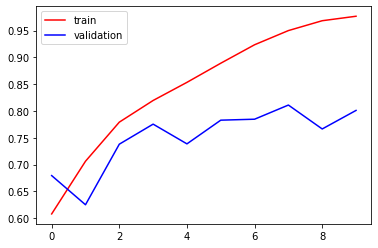

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()